# Effective Pandas from Matt Harrison's PyData Salt Lake City

from related YouTube [talk](https://www.youtube.com/watch?v=zgbUk90aQ6A)

There wasn't an accompanying notebook, so I decided to make one myself!

**Reminder:** numpy int types do not support null values, but numpy's float does

## Workflow

- Inspect columns by data type using `select_dtypes()`
    - Look for null values
        - Use `value_counts(dropna=False)`
        - Use `query("some_column.isnal()")` to filter to actual records or rows with null values
    - Columns with object/str data types, investigate if can be converted to categorical data type
- Use smaller "bitness" to conserve memory consumption
    - Use numpy's iinfo() or finfo() to look-up min/max range of int/float types
- Use chaining, if can't do chaining, then use pipe()
- Avoid using apply() and inplace=True

In [196]:
import numpy as np
import pandas as pd
pd.options.display.max_rows=1000

Sample data's [dictionary](https://www.fueleconomy.gov/feg/ws/index.shtml#vehicle)

In [11]:
autos = pd.read_csv('https://www.fueleconomy.gov/feg/epadata/vehicles.csv.zip')

In [12]:
autos

,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,...,mfrCode,c240Dscr,charge240b,c240bDscr,createdOn,modifiedOn,startStop,phevCity,phevHwy,phevComb
0,15.695714,0.0,0.0,0.0,19,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
1,29.964545,0.0,0.0,0.0,9,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
2,12.207778,0.0,0.0,0.0,23,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
3,29.964545,0.0,0.0,0.0,10,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
4,17.347895,0.0,0.0,0.0,17,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
5,14.982273,0.0,0.0,0.0,21,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
6,13.184400,0.0,0.0,0.0,22,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
7,13.733750,0.0,0.0,0.0,23,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
8,12.677308,0.0,0.0,0.0,23,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
9,13.184400,0.0,0.0,0.0,23,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0


In [13]:
autos.columns

Index(['barrels08', 'barrelsA08', 'charge120', 'charge240', 'city08',
       'city08U', 'cityA08', 'cityA08U', 'cityCD', 'cityE', 'cityUF', 'co2',
       'co2A', 'co2TailpipeAGpm', 'co2TailpipeGpm', 'comb08', 'comb08U',
       'combA08', 'combA08U', 'combE', 'combinedCD', 'combinedUF', 'cylinders',
       'displ', 'drive', 'engId', 'eng_dscr', 'feScore', 'fuelCost08',
       'fuelCostA08', 'fuelType', 'fuelType1', 'ghgScore', 'ghgScoreA',
       'highway08', 'highway08U', 'highwayA08', 'highwayA08U', 'highwayCD',
       'highwayE', 'highwayUF', 'hlv', 'hpv', 'id', 'lv2', 'lv4', 'make',
       'model', 'mpgData', 'phevBlended', 'pv2', 'pv4', 'range', 'rangeCity',
       'rangeCityA', 'rangeHwy', 'rangeHwyA', 'trany', 'UCity', 'UCityA',
       'UHighway', 'UHighwayA', 'VClass', 'year', 'youSaveSpend', 'guzzler',
       'trans_dscr', 'tCharger', 'sCharger', 'atvType', 'fuelType2', 'rangeA',
       'evMotor', 'mfrCode', 'c240Dscr', 'charge240b', 'c240bDscr',
       'createdOn', 'modifiedOn

#### There are a lot of columns, so let's limit to those we're interested in

In [16]:
cols = ['city08', 'comb08', 'highway08', 'cylinders', 'displ', 'drive', 'eng_dscr', 'fuelCost08', 'make', 'model', 'trany', 'range', 'createdOn', 'year']

In [17]:
autos[cols].dtypes

city08          int64
comb08          int64
highway08       int64
cylinders     float64
displ         float64
drive          object
eng_dscr       object
fuelCost08      int64
make           object
model          object
trany          object
range           int64
createdOn      object
year            int64
dtype: object

In [18]:
autos[cols].memory_usage(deep=True)

Index             128
city08         354984
comb08         354984
highway08      354984
cylinders      354984
displ          354984
drive         3263016
eng_dscr      2325970
fuelCost08     354984
make          2810923
model         3038609
trany         3167523
range          354984
createdOn     3771705
year           354984
dtype: int64

In [19]:
autos[cols].memory_usage(deep=True).sum()

21217746

## Inspecting Integer columns and Reducing Bitness

In [42]:
(autos
 [cols]
 .select_dtypes('integer')
 .describe()
)

,city08,comb08,highway08,fuelCost08,range,year
count,44373.000000,44373.000000,44373.000000,44373.000000,44373.000000,44373.000000
mean,18.793681,21.027584,24.892322,2807.415545,1.480472,2002.952403
std,9.158215,8.767614,8.584974,784.060168,19.170323,11.862006
min,6.000000,7.000000,9.000000,450.000000,0.000000,1984.000000
25%,15.000000,17.000000,20.000000,2300.000000,0.000000,1992.000000
50%,17.000000,20.000000,24.000000,2800.000000,0.000000,2004.000000
75%,21.000000,23.000000,28.000000,3200.000000,0.000000,2014.000000
max,150.000000,142.000000,133.000000,8750.000000,520.000000,2022.000000


#### comb08 has a minimum value of 7 and a maximum value of 142

#### Q: Can comb08 be an int8 instead of int64?

In [23]:
np.iinfo(np.int8)

iinfo(min=-128, max=127, dtype=int8)

In [24]:
np.iinfo(np.int16)

iinfo(min=-32768, max=32767, dtype=int16)

#### A: No, we could use int16

In [26]:
(autos
    [cols]
    .astype(
        {
            'highway08': 'int16',
            'city08': 'int16',
            'comb08': 'int16',
            'fuelCost08': 'int16',
            'range': 'int16',
            'year': 'int16'
        }
    )
    .select_dtypes('integer')
    .describe()
)

,city08,comb08,highway08,fuelCost08,range,year
count,44373.000000,44373.000000,44373.000000,44373.000000,44373.000000,44373.000000
mean,18.793681,21.027584,24.892322,2807.415545,1.480472,2002.952403
std,9.158215,8.767614,8.584974,784.060168,19.170323,11.862006
min,6.000000,7.000000,9.000000,450.000000,0.000000,1984.000000
25%,15.000000,17.000000,20.000000,2300.000000,0.000000,1992.000000
50%,17.000000,20.000000,24.000000,2800.000000,0.000000,2004.000000
75%,21.000000,23.000000,28.000000,3200.000000,0.000000,2014.000000
max,150.000000,142.000000,133.000000,8750.000000,520.000000,2022.000000


#### Let's see what the memory usage is now

In [28]:
(autos
    [cols]
    .astype(
        {
            'highway08': 'int16',
            'city08': 'int16',
            'comb08': 'int16',
            'fuelCost08': 'int16',
            'range': 'int16',
            'year': 'int16'
        }
    )
    .memory_usage(deep=True)
    .sum()
)

19620318

#### versus before:

In [54]:
(autos
    [cols]
    .memory_usage(deep=True)
    .sum()
)

21217746

## Inspecting Float Columns and Reducing Bitness

In [44]:
(autos
    [cols]
    .select_dtypes('float')
    .describe()
)

,cylinders,displ
count,44039.000000,44041.000000
mean,5.710779,3.283209
std,1.768438,1.357694
min,2.000000,0.000000
25%,4.000000,2.200000
50%,6.000000,3.000000
75%,6.000000,4.200000
max,16.000000,8.400000


In [29]:
(autos
    [cols]
    .select_dtypes('float')
)

,cylinders,displ
0,4.0,2.0
1,12.0,4.9
2,4.0,2.2
3,8.0,5.2
4,4.0,2.2
5,4.0,1.8
6,4.0,1.8
7,4.0,1.6
8,4.0,1.6
9,4.0,1.8


#### Generally, cylinders are whole numbers, so why was cylinders cast as float?  Perhaps there were null values?

In [30]:
autos['cylinders'].value_counts(dropna=False)

4.0     17307
6.0     15203
8.0      9451
5.0       775
12.0      688
3.0       348
NaN       334
10.0      187
2.0        63
16.0       17
Name: cylinders, dtype: int64

In [48]:
(autos
 [cols]
 .query("cylinders.isna()")
)

,city08,comb08,highway08,cylinders,displ,drive,eng_dscr,fuelCost08,make,model,trany,range,createdOn,year
7138,81,85,91,NaN,NaN,NaN,NaN,800,Nissan,Altra EV,NaN,90,Tue Jan 01 00:00:00 EST 2013,2000
7139,81,72,64,NaN,NaN,2-Wheel Drive,NaN,900,Toyota,RAV4 EV,NaN,88,Tue Jan 01 00:00:00 EST 2013,2000
8143,81,72,64,NaN,NaN,2-Wheel Drive,NaN,900,Toyota,RAV4 EV,NaN,88,Tue Jan 01 00:00:00 EST 2013,2001
8144,74,65,58,NaN,NaN,NaN,NaN,1000,Ford,Th!nk,NaN,29,Tue Jan 01 00:00:00 EST 2013,2001
8146,45,39,33,NaN,NaN,2-Wheel Drive,NaN,1700,Ford,Explorer USPS Electric,NaN,38,Tue Jan 01 00:00:00 EST 2013,2001
8147,84,75,66,NaN,NaN,NaN,NaN,900,Nissan,Hyper-Mini,NaN,33,Tue Jan 01 00:00:00 EST 2013,2001
9212,87,78,69,NaN,NaN,2-Wheel Drive,NaN,850,Toyota,RAV4 EV,NaN,95,Tue Jan 01 00:00:00 EST 2013,2002
9213,45,39,33,NaN,NaN,2-Wheel Drive,NaN,1700,Ford,Explorer USPS Electric,NaN,38,Tue Jan 01 00:00:00 EST 2013,2002
10329,87,78,69,NaN,NaN,2-Wheel Drive,NaN,850,Toyota,RAV4 EV,NaN,95,Tue Jan 01 00:00:00 EST 2013,2003
21410,22,24,28,NaN,NaN,4-Wheel Drive,NaN,2100,Subaru,RX Turbo,Manual 5-spd,0,Tue Jan 01 00:00:00 EST 2013,1985


#### As suspected, there were null values and for the most  part, vehicles with missing cylinder values appear to be electric vehicles

In [39]:
(autos
    [cols]
    .assign(cylinders=autos['cylinders'].fillna(0).astype('int8'),
            displ=autos['displ'].fillna(0).astype('float16')
    )
    .astype(
        {
            'highway08': 'int16',
            'city08': 'int16',
            'comb08': 'int16',
            'fuelCost08': 'int16',
            'range': 'int16',
            'year': 'int16',
        }
    )
    .describe()
)

,city08,comb08,highway08,cylinders,displ,fuelCost08,range,year
count,44373.000000,44373.000000,44373.000000,44373.000000,4.437300e+04,44373.000000,44373.000000,44373.000000
mean,18.793681,21.027584,24.892322,5.667793,inf,2807.415545,1.480472,2002.952403
std,9.158215,8.767614,8.584974,1.829609,1.381836e+00,784.060168,19.170323,11.862006
min,6.000000,7.000000,9.000000,0.000000,0.000000e+00,450.000000,0.000000,1984.000000
25%,15.000000,17.000000,20.000000,4.000000,2.099609e+00,2300.000000,0.000000,1992.000000
50%,17.000000,20.000000,24.000000,6.000000,3.000000e+00,2800.000000,0.000000,2004.000000
75%,21.000000,23.000000,28.000000,6.000000,4.199219e+00,3200.000000,0.000000,2014.000000
max,150.000000,142.000000,133.000000,16.000000,8.398438e+00,8750.000000,520.000000,2022.000000


In [40]:
(autos
    [cols]
    .select_dtypes('object')
)

,drive,eng_dscr,make,model,trany,createdOn
0,Rear-Wheel Drive,(FFS),Alfa Romeo,Spider Veloce 2000,Manual 5-spd,Tue Jan 01 00:00:00 EST 2013
1,Rear-Wheel Drive,(GUZZLER),Ferrari,Testarossa,Manual 5-spd,Tue Jan 01 00:00:00 EST 2013
2,Front-Wheel Drive,(FFS),Dodge,Charger,Manual 5-spd,Tue Jan 01 00:00:00 EST 2013
3,Rear-Wheel Drive,NaN,Dodge,B150/B250 Wagon 2WD,Automatic 3-spd,Tue Jan 01 00:00:00 EST 2013
4,4-Wheel or All-Wheel Drive,"(FFS,TRBO)",Subaru,Legacy AWD Turbo,Manual 5-spd,Tue Jan 01 00:00:00 EST 2013
5,Front-Wheel Drive,(FFS),Subaru,Loyale,Automatic 3-spd,Tue Jan 01 00:00:00 EST 2013
6,Front-Wheel Drive,(FFS),Subaru,Loyale,Manual 5-spd,Tue Jan 01 00:00:00 EST 2013
7,Front-Wheel Drive,(FFS),Toyota,Corolla,Automatic 3-spd,Tue Jan 01 00:00:00 EST 2013
8,Front-Wheel Drive,(FFS),Toyota,Corolla,Manual 5-spd,Tue Jan 01 00:00:00 EST 2013
9,Front-Wheel Drive,(FFS),Toyota,Corolla,Automatic 4-spd,Tue Jan 01 00:00:00 EST 2013


In [43]:
(autos
    ['drive']
    .value_counts(dropna=False)
)

Front-Wheel Drive             14976
Rear-Wheel Drive              14623
4-Wheel or All-Wheel Drive     6645
All-Wheel Drive                4153
4-Wheel Drive                  1932
NaN                            1186
2-Wheel Drive                   507
Part-time 4-Wheel Drive         351
Name: drive, dtype: int64

In [41]:
(autos
    ['trany']
    .value_counts(dropna=False)
)

Automatic 4-spd                     11048
Manual 5-spd                         8383
Automatic (S6)                       3274
Automatic 3-spd                      3151
Manual 6-spd                         2939
Automatic (S8)                       2471
Automatic 5-spd                      2203
Automatic 6-spd                      1740
Manual 4-spd                         1483
Automatic (variable gear ratios)      967
Automatic (S5)                        842
Automatic 7-spd                       720
Automatic 8-spd                       703
Automatic (AM-S7)                     623
Automatic 9-spd                       546
Automatic (S7)                        368
Automatic (A1)                        315
Automatic (S10)                       311
Automatic (AM7)                       299
Automatic (AV-S6)                     266
Automatic (S4)                        233
Automatic (AV-S7)                     186
Automatic (AM-S8)                     184
Automatic (S9)                    

In [61]:
(autos
    [cols]
    .assign(cylinders=autos['cylinders'].fillna(0).astype('int8'),
            displ=autos['displ'].fillna(0).astype('float16'),
            drive=autos['drive'].fillna('Other').astype('category'),
            automatic=autos['trany'].str.contains('Auto'),
            speeds=autos['trany'].str.extract(r'(\d)+').fillna('20').astype('int8'),
            createdOn=pd.to_datetime(autos['createdOn']).dt.tz_convert('America/New_York')
    )
    .astype(
        {
            'highway08': 'int16',
            'city08': 'int16',
            'comb08': 'int16',
            'fuelCost08': 'int16',
            'range': 'int16',
            'year': 'int16',
            'make': 'category'
        }
    )
    .drop(columns='trany')
    .memory_usage(deep=True)
    .sum()
)

8122694

In [64]:
(autos
    [cols]
    .assign(cylinders=autos['cylinders'].fillna(0).astype('int8'),
            displ=autos['displ'].fillna(0).astype('float16'),
            drive=autos['drive'].fillna('Other').astype('category'),
            automatic=autos['trany'].str.contains('Auto'),
            speeds=autos['trany'].str.extract(r'(\d)+').fillna('20').astype('int8'),
            createdOn=pd.to_datetime(autos['createdOn']).dt.tz_convert('America/New_York')
    )
    .astype(
        {
            'highway08': 'int16',
            'city08': 'int16',
            'comb08': 'int16',
            'fuelCost08': 'int16',
            'range': 'int16',
            'year': 'int16',
            'make': 'category'
        }
    )
    .drop(columns='eng_dscr')
)

,city08,comb08,highway08,cylinders,displ,drive,fuelCost08,make,model,trany,range,createdOn,year,automatic,speeds
0,19,21,25,4,2.000000,Rear-Wheel Drive,2400,Alfa Romeo,Spider Veloce 2000,Manual 5-spd,0,2013-01-01 00:00:00-05:00,1985,False,5
1,9,11,14,12,4.898438,Rear-Wheel Drive,4600,Ferrari,Testarossa,Manual 5-spd,0,2013-01-01 00:00:00-05:00,1985,False,5
2,23,27,33,4,2.199219,Front-Wheel Drive,1900,Dodge,Charger,Manual 5-spd,0,2013-01-01 00:00:00-05:00,1985,False,5
3,10,11,12,8,5.199219,Rear-Wheel Drive,4600,Dodge,B150/B250 Wagon 2WD,Automatic 3-spd,0,2013-01-01 00:00:00-05:00,1985,True,3
4,17,19,23,4,2.199219,4-Wheel or All-Wheel Drive,3200,Subaru,Legacy AWD Turbo,Manual 5-spd,0,2013-01-01 00:00:00-05:00,1993,False,5
5,21,22,24,4,1.799805,Front-Wheel Drive,2300,Subaru,Loyale,Automatic 3-spd,0,2013-01-01 00:00:00-05:00,1993,True,3
6,22,25,29,4,1.799805,Front-Wheel Drive,2050,Subaru,Loyale,Manual 5-spd,0,2013-01-01 00:00:00-05:00,1993,False,5
7,23,24,26,4,1.599609,Front-Wheel Drive,2100,Toyota,Corolla,Automatic 3-spd,0,2013-01-01 00:00:00-05:00,1993,True,3
8,23,26,31,4,1.599609,Front-Wheel Drive,1950,Toyota,Corolla,Manual 5-spd,0,2013-01-01 00:00:00-05:00,1993,False,5
9,23,25,30,4,1.799805,Front-Wheel Drive,2050,Toyota,Corolla,Automatic 4-spd,0,2013-01-01 00:00:00-05:00,1993,True,4


In [65]:
def tweak_autos(autos: pd.DataFrame) -> None:
    return (
        autos
        [cols]
        .assign(cylinders=autos['cylinders'].fillna(0).astype('int8'),
                displ=autos['displ'].fillna(0).astype('float16'),
                drive=autos['drive'].fillna('Other').astype('category'),
                automatic=autos['trany'].str.contains('Auto'),
                speeds=autos['trany'].str.extract(r'(\d)+').fillna('20').astype('int8'),
                createdOn=pd.to_datetime(autos['createdOn']).dt.tz_convert('America/New_York')
        )
        .astype(
            {
                'highway08': 'int16',
                'city08': 'int16',
                'comb08': 'int16',
                'fuelCost08': 'int16',
                'range': 'int16',
                'year': 'int16',
                'make': 'category'
            }
        )
        .drop(columns='eng_dscr')
    )

In [66]:
tweak_autos(autos)

,city08,comb08,highway08,cylinders,displ,drive,fuelCost08,make,model,trany,range,createdOn,year,automatic,speeds
0,19,21,25,4,2.000000,Rear-Wheel Drive,2400,Alfa Romeo,Spider Veloce 2000,Manual 5-spd,0,2013-01-01 00:00:00-05:00,1985,False,5
1,9,11,14,12,4.898438,Rear-Wheel Drive,4600,Ferrari,Testarossa,Manual 5-spd,0,2013-01-01 00:00:00-05:00,1985,False,5
2,23,27,33,4,2.199219,Front-Wheel Drive,1900,Dodge,Charger,Manual 5-spd,0,2013-01-01 00:00:00-05:00,1985,False,5
3,10,11,12,8,5.199219,Rear-Wheel Drive,4600,Dodge,B150/B250 Wagon 2WD,Automatic 3-spd,0,2013-01-01 00:00:00-05:00,1985,True,3
4,17,19,23,4,2.199219,4-Wheel or All-Wheel Drive,3200,Subaru,Legacy AWD Turbo,Manual 5-spd,0,2013-01-01 00:00:00-05:00,1993,False,5
5,21,22,24,4,1.799805,Front-Wheel Drive,2300,Subaru,Loyale,Automatic 3-spd,0,2013-01-01 00:00:00-05:00,1993,True,3
6,22,25,29,4,1.799805,Front-Wheel Drive,2050,Subaru,Loyale,Manual 5-spd,0,2013-01-01 00:00:00-05:00,1993,False,5
7,23,24,26,4,1.599609,Front-Wheel Drive,2100,Toyota,Corolla,Automatic 3-spd,0,2013-01-01 00:00:00-05:00,1993,True,3
8,23,26,31,4,1.599609,Front-Wheel Drive,1950,Toyota,Corolla,Manual 5-spd,0,2013-01-01 00:00:00-05:00,1993,False,5
9,23,25,30,4,1.799805,Front-Wheel Drive,2050,Toyota,Corolla,Automatic 4-spd,0,2013-01-01 00:00:00-05:00,1993,True,4


# Aggregations

In [67]:
autos2 = tweak_autos(autos)

#### Mean calculation on all numeric columns for each year

In [68]:
(autos2
    .groupby('year')
    .mean()
)

,city08,comb08,highway08,cylinders,displ,fuelCost08,range,speeds
year,,,,,,,,
1984,17.982688,19.881874,23.075356,5.385438,3.164062,2786.889002,0.000000,3.928208
1985,17.878307,19.808348,23.042328,5.375661,3.164062,2810.376249,0.000000,3.924750
1986,17.665289,19.550413,22.699174,5.425620,3.183594,2834.380165,0.000000,3.984298
1987,17.310345,19.228549,22.445068,5.412189,3.173828,2893.263833,0.000000,4.037690
1988,17.333628,19.328319,22.702655,5.461947,3.195312,2870.707965,0.000000,4.129204
1989,17.143972,19.125759,22.465742,5.488291,3.208984,2925.108413,0.000000,4.166522
1990,17.033395,19.000928,22.337662,5.496289,3.216797,2928.432282,0.000000,4.238404
1991,16.848940,18.825972,22.253534,5.598940,3.267578,2987.985866,0.000000,4.301237
1992,16.805531,18.862623,22.439786,5.623550,3.275391,2992.908118,0.000000,4.318466


In [71]:
(autos2
    .groupby('year')
    [['comb08','speeds']]
    .mean()
)

,comb08,speeds
year,,
1984,19.881874,3.928208
1985,19.808348,3.924750
1986,19.550413,3.984298
1987,19.228549,4.037690
1988,19.328319,4.129204
1989,19.125759,4.166522
1990,19.000928,4.238404
1991,18.825972,4.301237
1992,18.862623,4.318466


## Plotting

In [80]:
import seaborn as sns

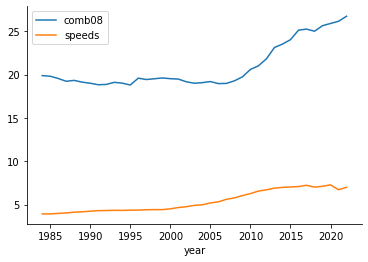

In [81]:
(autos2
    .groupby('year')
    [['comb08','speeds']]
    .mean()
    .plot()
)
sns.despine()

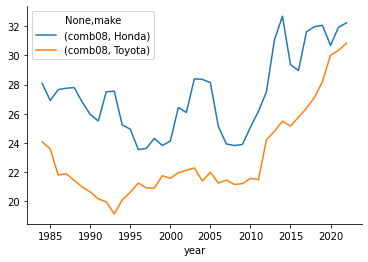

In [165]:
(autos2
    .groupby(['year','make'])
    [['comb08']]
    .mean()
    .query("make in('Honda','Toyota')")
    .unstack()
    .plot()
)
sns.despine()

In [236]:
autos2.head()

,city08,comb08,highway08,cylinders,displ,drive,fuelCost08,make,model,trany,range,createdOn,year,automatic,speeds
0,19,21,25,4,2.000000,Rear-Wheel Drive,2400,Alfa Romeo,Spider Veloce 2000,Manual 5-spd,0,2013-01-01 00:00:00-05:00,1985,False,5
1,9,11,14,12,4.898438,Rear-Wheel Drive,4600,Ferrari,Testarossa,Manual 5-spd,0,2013-01-01 00:00:00-05:00,1985,False,5
2,23,27,33,4,2.199219,Front-Wheel Drive,1900,Dodge,Charger,Manual 5-spd,0,2013-01-01 00:00:00-05:00,1985,False,5
3,10,11,12,8,5.199219,Rear-Wheel Drive,4600,Dodge,B150/B250 Wagon 2WD,Automatic 3-spd,0,2013-01-01 00:00:00-05:00,1985,True,3
4,17,19,23,4,2.199219,4-Wheel or All-Wheel Drive,3200,Subaru,Legacy AWD Turbo,Manual 5-spd,0,2013-01-01 00:00:00-05:00,1993,False,5


In [82]:
def country(val: str) -> str:
    if val in {'Chevrolet', 'Ford', 'Dodge', 'GMC', 'Tesla'}:
        return 'US'
    else:
        return 'Other'

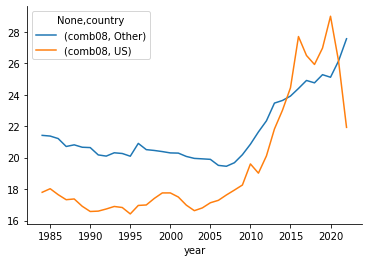

In [241]:
(autos2
    .assign(country=autos2['make'].apply(country))
    .groupby(['year','country'])
    [['comb08']]
    .mean()
    .unstack()
    .plot()
)
sns.despine()

In [242]:
(autos2.query("year == 2019 and cylinders > 0")
    .groupby('make')
    [['comb08']]
    .mean()
    .sort_values(by='comb08', ascending=False)
)

,comb08
make,
Honda,30.319149
Hyundai,29.809524
Kia,28.833333
Mazda,28.304348
Toyota,28.206349
Mitsubishi,28.176471
Fiat,28.000000
MINI,26.972222
Volkswagen,26.807692
